#Intro:  EDA

In [21]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [22]:
#filter for US data analyst roles

df_da_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]

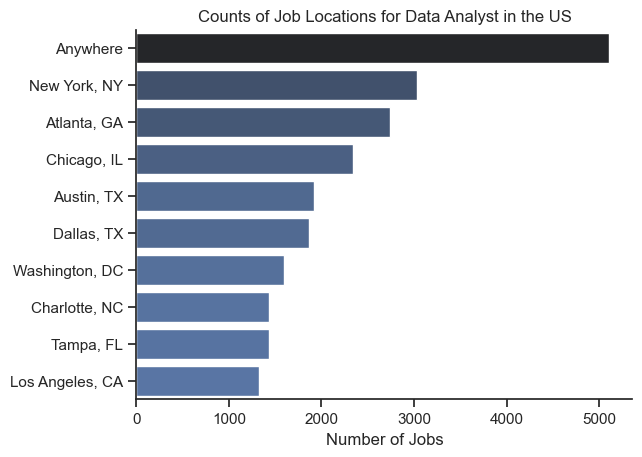

In [23]:
df_plot=df_da_us['job_location'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

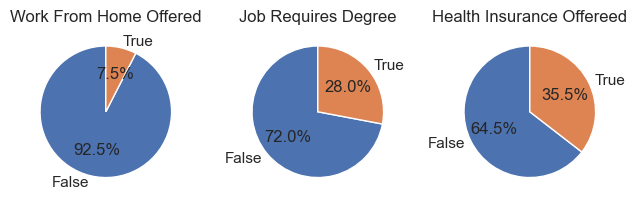

In [24]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home':'Work From Home Offered', 
    'job_no_degree_mention': 'Job Requires Degree', 
    'job_health_insurance':'Health Insurance Offereed'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(),  startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
fig.tight_layout()
plt.show()

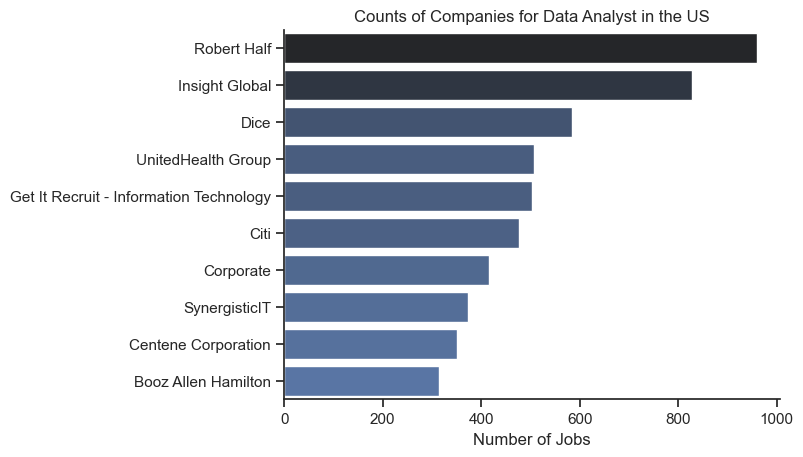

In [25]:
df_plot=df_da_us['company_name'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

In [26]:
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


Text(0.5, 1.0, 'Distribution of Salaries for US Data Analysts')

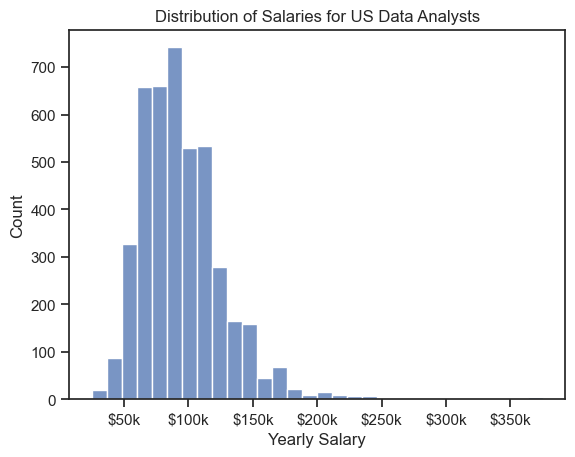

In [27]:
sns.histplot(data=df_da_us['salary_year_avg'], bins=30)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlabel('Yearly Salary')
plt.title("Distribution of Salaries for US Data Analysts")


In [28]:
from scipy import stats
import numpy as np
import statistics

##Investigating the advantage of learning Python for Data Analytics

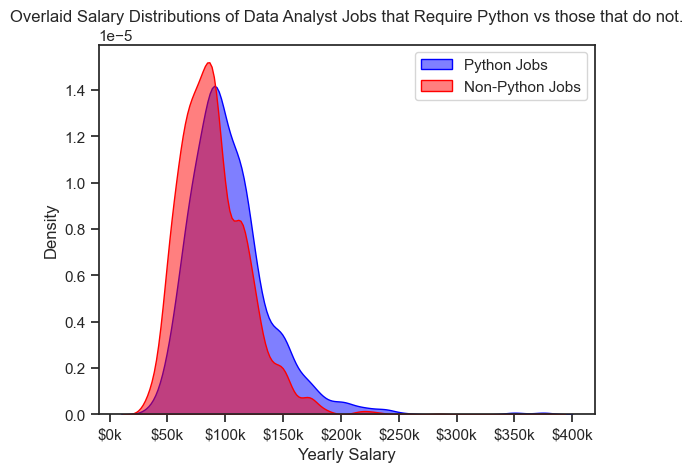

In [40]:
df_da_us_nona = df_da_us.dropna(subset=['job_skills'])

df_da_us_explode = df_da_us_nona.explode('job_skills')


python_jobs = []
no_python_jobs=[]
for i in range(len(df_da_us_nona)):
    if 'python' in df_da_us_nona['job_skills'].iloc[i]:
        python_jobs.append(df_da_us_nona.index[i])
    else:
        no_python_jobs.append(df_da_us_nona.index[i])


df_da_us_python = df_da_us_nona[df_da_us_nona.index.isin(python_jobs)]

df_da_us_no_python = df_da_us_nona[~df_da_us_nona.index.isin(python_jobs)]





df_da_us_no_python = df_da_us_no_python.dropna(subset=['salary_year_avg'])
df_da_us_python = df_da_us_python.dropna(subset=['salary_year_avg'])

sns.set_theme(style='ticks')
sns.kdeplot(data=df_da_us_python, x='salary_year_avg' ,color='blue',label='Python Jobs' , alpha=0.5, fill=True)
sns.kdeplot(data=df_da_us_no_python, x='salary_year_avg',color='red',label='Non-Python Jobs' , alpha=0.5, fill=True)
plt.xlabel('Yearly Salary')
plt.ylabel('Density')
plt.title('Overlaid Salary Distributions of Data Analyst Jobs that Require Python vs those that do not.')
plt.legend()
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))


In [30]:
statistics.stdev(df_da_us_no_python['salary_year_avg'])

29700.911890997217

In [31]:
statistics.stdev(df_da_us_python['salary_year_avg'])

35500.9702628491

In [32]:
#Testing whether the mean salaries of python jobs is different than the mean salary of non-python jobs
#We can probably assume the variances of the two groups are near-equal

t, p = stats.ttest_ind(df_da_us_python['salary_year_avg'], df_da_us_no_python['salary_year_avg'])

print(f"T-statistic: {t:.3f}")
print(f"P-value: {p:.10f}")
print(f"One-Sided P-Value:  {(p/2):.10f}")

T-statistic: 12.893
P-value: 0.0000000000
One-Sided P-Value:  0.0000000000


In [33]:
df_ds_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Scientist')]
df_de_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Engineer')]

52727.27359077021 35500.9702628491
T-statistic: 4.866
P-value: 0.0000011837
One-Sided P-Value:  0.0000005918


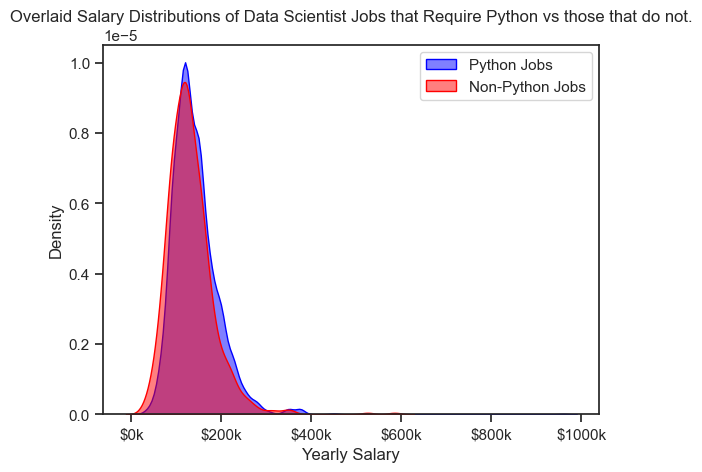

In [41]:
df_ds_us_nona = df_ds_us.dropna(subset=['job_skills'])

df_ds_us_explode = df_ds_us_nona.explode('job_skills')


python_jobs = []
no_python_jobs=[]
for i in range(len(df_ds_us_nona)):
    if 'python' in df_ds_us_nona['job_skills'].iloc[i]:
        python_jobs.append(df_ds_us_nona.index[i])
    else:
        no_python_jobs.append(df_ds_us_nona.index[i])


df_ds_us_python = df_ds_us_nona[df_ds_us_nona.index.isin(python_jobs)]

df_ds_us_no_python = df_ds_us_nona[~df_ds_us_nona.index.isin(python_jobs)]





df_ds_us_no_python = df_ds_us_no_python.dropna(subset=['salary_year_avg'])
df_ds_us_python = df_ds_us_python.dropna(subset=['salary_year_avg'])

sns.set_theme(style='ticks')
sns.kdeplot(data=df_ds_us_python, x='salary_year_avg' ,color='blue',label='Python Jobs' , alpha=0.5, fill=True)
sns.kdeplot(data=df_ds_us_no_python, x='salary_year_avg',color='red',label='Non-Python Jobs' , alpha=0.5, fill=True)
plt.xlabel('Yearly Salary')
plt.ylabel('Density')
plt.title('Overlaid Salary Distributions of Data Scientist Jobs that Require Python vs those that do not.')
plt.legend()
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))

print(statistics.stdev(df_ds_us_no_python['salary_year_avg']), statistics.stdev(df_da_us_python['salary_year_avg']))

t, p = stats.ttest_ind(df_ds_us_python['salary_year_avg'], df_ds_us_no_python['salary_year_avg'])

print(f"T-statistic: {t:.3f}")
print(f"P-value: {p:.10f}")
print(f"One-Sided P-Value:  {(p/2):.10f}")

40192.794147597415 35500.9702628491
T-statistic: 3.446
P-value: 0.0005768516
One-Sided P-Value:  0.0002884258


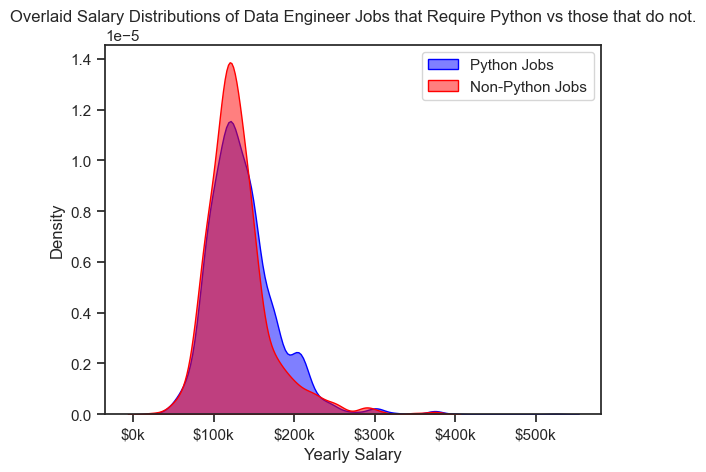

In [42]:
df_de_us_nona = df_de_us.dropna(subset=['job_skills'])

df_de_us_explode = df_de_us_nona.explode('job_skills')


python_jobs = []
no_python_jobs=[]
for i in range(len(df_de_us_nona)):
    if 'python' in df_de_us_nona['job_skills'].iloc[i]:
        python_jobs.append(df_de_us_nona.index[i])
    else:
        no_python_jobs.append(df_de_us_nona.index[i])


df_de_us_python = df_de_us_nona[df_de_us_nona.index.isin(python_jobs)]

df_de_us_no_python = df_de_us_nona[~df_de_us_nona.index.isin(python_jobs)]





df_de_us_no_python = df_de_us_no_python.dropna(subset=['salary_year_avg'])
df_de_us_python = df_de_us_python.dropna(subset=['salary_year_avg'])

sns.set_theme(style='ticks')
sns.kdeplot(data=df_de_us_python, x='salary_year_avg' ,color='blue',label='Python Jobs' , alpha=0.5, fill=True)
sns.kdeplot(data=df_de_us_no_python, x='salary_year_avg',color='red',label='Non-Python Jobs' , alpha=0.5, fill=True)
plt.xlabel('Yearly Salary')
plt.ylabel('Density')
plt.title('Overlaid Salary Distributions of Data Engineer Jobs that Require Python vs those that do not.')
plt.legend()
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))

print(statistics.stdev(df_de_us_no_python['salary_year_avg']), statistics.stdev(df_da_us_python['salary_year_avg']))

t, p = stats.ttest_ind(df_de_us_python['salary_year_avg'], df_de_us_no_python['salary_year_avg'])

print(f"T-statistic: {t:.3f}")
print(f"P-value: {p:.10f}")
print(f"One-Sided P-Value:  {(p/2):.10f}")